# Inspect state of DB

In [1]:
import os
import yaml
from sqlalchemy import create_engine, text
import pandas as pd

with open("/home/ubuntu/work/therapeutic_accelerator/config/main.yaml", "r") as f:
    config = yaml.load(f, Loader=yaml.FullLoader)
    
with open("../config/keys.yaml", "r") as f:
    keys = yaml.load(f, Loader=yaml.FullLoader)
    
bucket_path = os.path.join(config['paths']['root'], config['paths']['mount'])

# Create engine to connect to database
engine = create_engine(f'postgresql://postgres:{keys["postgres"]}@{config["database"]["host"]}:5432/postgres')

In [2]:
from sqlalchemy import inspect
inspector = inspect(engine)
schemas = inspector.get_schema_names()

for schema in schemas:
    print("schema: %s" % schema)
    for table_name in inspector.get_table_names(schema=schema):
        for column in inspector.get_columns(table_name, schema=schema):
            print("Column: %s" % column)

schema: information_schema
Column: {'name': 'feature_id', 'type': VARCHAR(), 'nullable': True, 'default': None, 'autoincrement': False, 'comment': None}
Column: {'name': 'feature_name', 'type': VARCHAR(), 'nullable': True, 'default': None, 'autoincrement': False, 'comment': None}
Column: {'name': 'is_supported', 'type': VARCHAR(), 'nullable': True, 'default': None, 'autoincrement': False, 'comment': None}
Column: {'name': 'is_verified_by', 'type': VARCHAR(), 'nullable': True, 'default': None, 'autoincrement': False, 'comment': None}
Column: {'name': 'comments', 'type': VARCHAR(), 'nullable': True, 'default': None, 'autoincrement': False, 'comment': None}
Column: {'name': 'implementation_info_id', 'type': VARCHAR(), 'nullable': True, 'default': None, 'autoincrement': False, 'comment': None}
Column: {'name': 'implementation_info_name', 'type': VARCHAR(), 'nullable': True, 'default': None, 'autoincrement': False, 'comment': None}
Column: {'name': 'integer_value', 'type': INTEGER(), 'nulla

In [8]:
sql = '''
    SELECT * FROM fulltext LIMIT 5;
'''

with engine.connect() as conn:
    query = conn.execute(text(sql))   
          
df = pd.DataFrame(query.fetchall())

df.shape
df.head()

,empty,Unnamed: 0,corpusid,text,source.pdfurls,source.pdfsha,source.oainfo,annotations.abstract,annotations.author,annotations.authoraffiliation,...,annotations.paragraph,annotations.publisher,annotations.sectionheader,annotations.table,annotations.tableref,annotations.title,annotations.venue,source.oainfo.license,source.oainfo.openaccessurl,source.oainfo.status
0,1410,1410,250929149,\nOPEN ACCESS EDITED BY\n\n\nAlexander Nikolae...,None,57f2173016853ed6f6406a962adb11da43917165,None,None,"[{""end"":55,""start"":25},{""end"":69,""start"":56},{...","[{""end"":455,""start"":306},{""end"":1102,""start"":4...",...,"[{""end"":2986,""start"":1939},{""end"":5396,""start""...",None,"[{""end"":3001,""start"":2989},{""end"":6895,""start""...","[{""end"":35560,""start"":34552},{""end"":38099,""sta...","[{""end"":18195,""start"":18188},{""end"":18790,""sta...","[{""end"":22,""start"":1},{""end"":1721,""start"":1700}]",None,None,None,None
1,1411,1411,215793097,\n\n\n\nCi Song \nState Key Laboratory of Repr...,None,be45f9e9d6d1f4f713546b943cb2ff455989adc2,None,None,"[{""end"":228,""start"":4},{""end"":380,""start"":229}...","[{""end"":104,""start"":13},{""end"":227,""start"":106...",...,"[{""end"":4286,""start"":3106},{""end"":4579,""start""...",None,"[{""end"":8781,""start"":8771}]",None,"[{""end"":4906,""start"":4898}]",None,None,None,https://academic.oup.com/biolreprod/article-pd...,BRONZE
2,1412,1412,246020601,\nCOVID-19 and the Otolaryngology Residency Ma...,None,b7decbb79e55bb3c9b5430bef4323775813c39e0,None,"[{""end"":2210,""start"":391}]","[{""end"":109,""start"":85},{""end"":127,""start"":110...",None,...,"[{""end"":4111,""start"":2226},{""end"":6227,""start""...",None,"[{""end"":2224,""start"":2212},{""end"":4135,""start""...","[{""end"":16114,""start"":15573},{""end"":16650,""sta...","[{""attributes"":{""ref_id"":""tab_0""},""end"":7027,""...","[{""end"":82,""start"":1},{""end"":227,""start"":146}]",None,None,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9...,GREEN
3,1413,1413,18163935,\nAnalysis of biophysical and functional conse...,None,895fdf69460791863817c037332c0403c3e917b1,None,"[{""end"":1608,""start"":861}]","[{""end"":217,""start"":201},{""end"":235,""start"":21...","[{""end"":363,""start"":257},{""end"":410,""start"":366}]",...,"[{""end"":2357,""start"":1610},{""end"":2910,""start""...",None,"[{""end"":7790,""start"":7769},{""end"":7810,""start""...","[{""end"":32871,""start"":32129}]","[{""attributes"":{""ref_id"":""tab_0""},""end"":12397,...","[{""end"":95,""start"":1},{""end"":506,""start"":412}]",None,CCBY,https://doi.org/10.1002/1873-3468.12346,HYBRID
4,1414,1414,237935836,\nImpact of Plant-Based Meat Alternatives on t...,None,acf534c72039d2b2c10544b12f7cc872c2ba1b2a,None,None,"[{""end"":289,""start"":123},{""end"":375,""start"":29...","[{""end"":219,""start"":148},{""end"":288,""start"":22...",...,"[{""end"":1885,""start"":1117},{""end"":3055,""start""...",None,"[{""attributes"":{""n"":""1.""},""end"":1115,""start"":1...","[{""end"":60480,""start"":59841},{""end"":61332,""sta...","[{""attributes"":{""ref_id"":""tab_1""},""end"":8301,""...","[{""end"":95,""start"":1},{""end"":755,""start"":661}]",None,CCBY,https://www.mdpi.com/2304-8158/10/9/2040/pdf,GOLD


In [7]:
df.dtypes

index                         int64
corpusid                      int64
externalids                  object
url                          object
title                        object
authors                      object
venue                        object
publicationvenueid           object
year                        float64
referencecount                int64
citationcount                 int64
influentialcitationcount      int64
isopenaccess                   bool
s2fieldsofstudy              object
publicationtypes             object
publicationdate              object
journal                      object
updated                      object
id                            int64
dtype: object

In [10]:
df.describe(include = 'all')

,index,corpusid,externalids,url,title,authors,venue,publicationvenueid,year,referencecount,citationcount,influentialcitationcount,isopenaccess,s2fieldsofstudy,publicationtypes,publicationdate,journal,updated,id
count,7.298170e+05,7.298170e+05,729817,729817,729817,729817,520336,495915,729740.000000,729817.000000,729817.000000,729817.000000,729817,729817,517323,658356,729526,729817,7.298170e+05
unique,NaN,NaN,729817,729817,729577,719983,14185,11886,NaN,NaN,NaN,NaN,2,4295,224,18224,559222,729249,NaN
top,NaN,NaN,"{""ACL"": null, ""DBLP"": null, ""ArXiv"": null, ""MA...",https://www.semanticscholar.org/paper/39063bcd...,Polycystic ovary syndrome,{},PLoS ONE,0aed7a40-85f3-4c66-9e1b-c1556c57001b,NaN,NaN,NaN,NaN,False,"{""{\""category\"": \""Medicine\"", \""source\"": \""s...",{JournalArticle},2017-03-01,"{""name"": """", ""pages"": null, ""volume"": """"}",2023-05-05T00:16:07.781Z,NaN
freq,NaN,NaN,1,1,3,59,10597,10597,NaN,NaN,NaN,NaN,472380,204829,310693,1596,13041,3,NaN
mean,7.585129e+05,7.319736e+07,NaN,NaN,NaN,NaN,NaN,NaN,2006.714619,40.077269,37.887153,1.569632,NaN,NaN,NaN,NaN,NaN,NaN,1.408789e+07
std,4.357933e+05,7.284456e+07,NaN,NaN,NaN,NaN,NaN,NaN,13.807698,40.740200,131.411091,9.077976,NaN,NaN,NaN,NaN,NaN,NaN,8.219446e+06
min,0.000000e+00,2.500000e+01,NaN,NaN,NaN,NaN,NaN,NaN,1825.000000,2.000000,2.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00
25%,4.068450e+05,1.845707e+07,NaN,NaN,NaN,NaN,NaN,NaN,2001.000000,18.000000,6.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,6.713447e+06
50%,7.706110e+05,4.206877e+07,NaN,NaN,NaN,NaN,NaN,NaN,2011.000000,32.000000,15.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.453364e+07
75%,1.133370e+06,9.705377e+07,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,50.000000,36.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.125595e+07


In [21]:
df.s2fieldsofstudy.str.replace(r'"|\\', '', regex = True).str.strip("{}").str.split(',')

In [8]:
import seaborn as sns

In [ ]:
# Unique Authors


<Axes: xlabel='referencecount', ylabel='Count'>

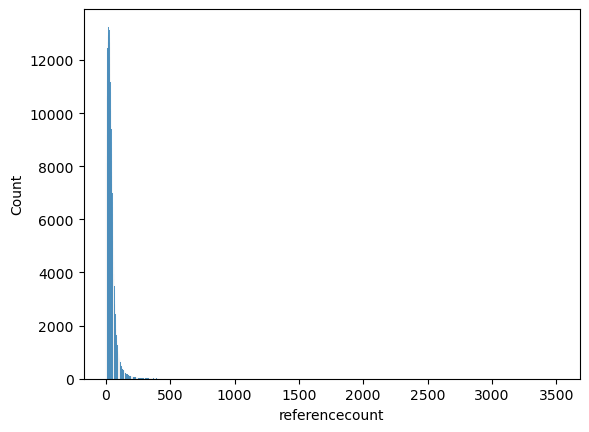

In [9]:
# Reference Count Distribution
sns.histplot(df, x = 'referencecount')